##Bank Note

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from keras.datasets import mnist

In [3]:
bank_note = pd.read_csv('/content/drive/MyDrive/banknote-authentication_csv.csv')

In [4]:
bank_note.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


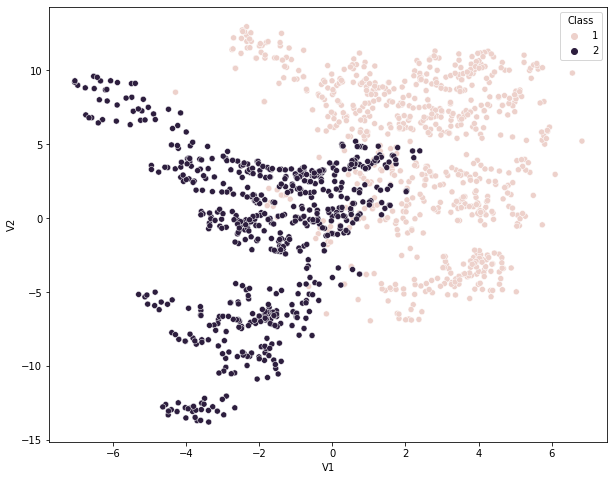

In [5]:
#Viewing Data
plt.figure(figsize=(10,8))
sns.scatterplot(x = bank_note['V1'], y = bank_note['V2'], hue = bank_note['Class'])

In [6]:
# Normalize
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = bank_note.iloc[:,:-1]
y = bank_note.iloc[:,-1]
columns = bank_note.iloc[:,:-1].columns
bank_note = pd.DataFrame(scale.fit_transform(X), columns = columns)

In [7]:
#Categorizing the Target variable
y = y.map({1:1,2:0})

In [43]:
#Splitting the Data
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()

model.add(layers.Dense(640, activation='relu', input_shape = (4,)))          #Taking 2/3 of the shape of the data
model.add(layers.Dense(426, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 0s 9ms/step - loss: 3.7020e-09 - accuracy: 0.5458 - val_loss: 1.6731e-09 - val_accuracy: 0.5777
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 3.6700e-09 - accuracy: 0.5458 - val_loss: 1.6735e-09 - val_accuracy: 0.5777
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 3.6057e-09 - accuracy: 0.5458 - val_loss: 1.6291e-09 - val_accuracy: 0.5777
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: 3.5761e-09 - accuracy: 0.5458 - val_loss: 1.5924e-09 - val_accuracy: 0.5777
Epoch 5/50
30/30 [==============================] - 0s 7ms/step - loss: 3.5071e-09 - accuracy: 0.5458 - val_loss: 1.5627e-09 - val_accuracy: 0.5777
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 3.4703e-09 - accuracy: 0.5458 - val_loss: 1.5587e-09 - val_accuracy: 0.5777
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 3.4207e-09 - accuracy: 0.5458 - val_loss

Model Evaluation

In [26]:
his = model.history.history
his['val_loss']
his['accuracy'][-1]

0.5458333492279053

Text(0.5, 1.0, 'Loss VS Epochs')

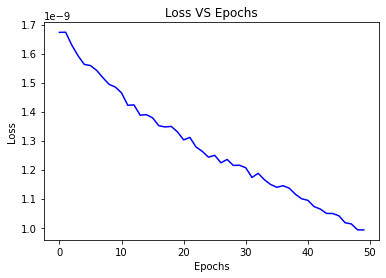

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(50),his['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss VS Epochs')

Text(0.5, 1.0, 'Loss VS Epochs')

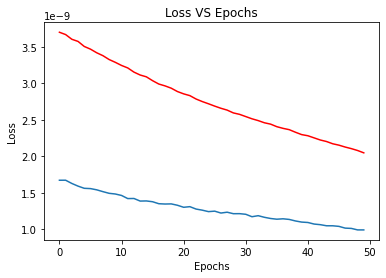

In [47]:
plt.plot(range(50),his['val_loss'])
plt.plot(range(50),his['loss'],'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss VS Epochs')

In [37]:
#Prediction
predicted = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [38]:
report = pd.DataFrame(classification_report(y_test,predicted,output_dict=True)).transpose()
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.00000,0.000000,174.00000
1,0.577670,1.00000,0.732308,238.00000
accuracy,0.577670,0.57767,0.577670,0.57767
macro avg,0.288835,0.50000,0.366154,412.00000
weighted avg,0.333703,0.57767,0.423032,412.00000


In [44]:
#Cross Validation
def cross_validate(X,y,cv=10):
    
    fold=StratifiedKFold(cv)
    
    corss_val_f1 = []
    cross_val_accuracy = []
    
    #Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # Training
      
    model.fit(X_train,y_train)
        
    # Prediction
    predicted=model.predict(X_test)
    
    # Evaluation
        
    f_score = f1_score(y_test,predicted,average='micro')
    accuracy = accuracy_score(y_test,predicted)
    corss_val_f1.append(f_score)
    cross_val_accuracy.append(accuracy)

#   return corss_val_f1,cross_val_accuracy
    return np.mean(corss_val_f1),np.mean(cross_val_accuracy)

In [45]:
cross_validate(X,y)

30/30 [==============================] - 0s 5ms/step - loss: 2.0299e-09 - accuracy: 0.5458


(0.5776699029126213, 0.5776699029126213)